# Exercise 02: Spectral Inversion

If you completed Exercise 01, this should only take a few minutes.

Let's install some packages:

In [6]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn numpy matplotlib ipywidgets ipympl

and import some stuff:

In [7]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt

The following code creates a plot widget below.  Feel free to dig into it if you want.

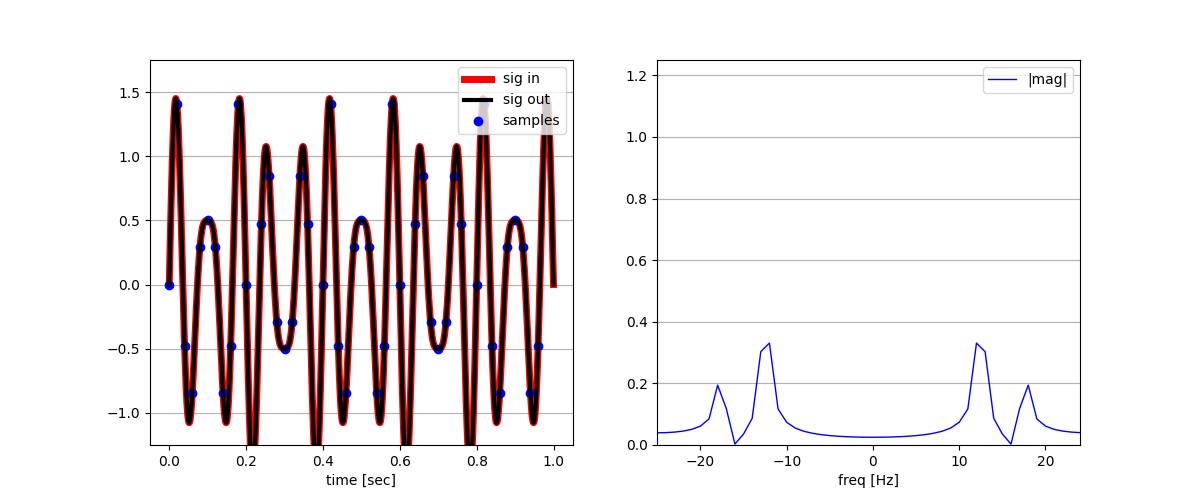

In [8]:
def create_plot():
    
    def generate_data (tone_freq_in__Hz, sample_rate__Hz):
        res = sklearn.utils.Bunch()
        
        res.tone_freq_in__Hz = tone_freq_in__Hz
        res.sample_rate__Hz  = sample_rate__Hz
        
        tone_freq_out__Hz = res.tone_freq_in__Hz
        while tone_freq_out__Hz <= -sample_rate__Hz/2:
            tone_freq_out__Hz += sample_rate__Hz
        while tone_freq_out__Hz > +sample_rate__Hz/2:
            tone_freq_out__Hz -= sample_rate__Hz

        res.tone_freq_out__Hz = tone_freq_out__Hz
        
        res.sample_period__sec = 1.0/res.sample_rate__Hz;
    
        res.t_lo__sec =  0.0;
        res.t_hi__sec =  1.0;
        
        res.ts_tone__sec = np.linspace(res.t_lo__sec, res.t_hi__sec, 1000)
        res.ts_samp__sec = np.arange(res.t_lo__sec, res.t_hi__sec, res.sample_period__sec); 

        res.ys_sig_in   = np.sin(2*np.pi * (res.tone_freq_in__Hz  - 2.5) * res.ts_tone__sec) + 0.5*np.sin(2*np.pi * (res.tone_freq_in__Hz  + 2.5) * res.ts_tone__sec)
        res.ys_sig_samp = np.sin(2*np.pi * (res.tone_freq_in__Hz  - 2.5) * res.ts_samp__sec) + 0.5*np.sin(2*np.pi * (res.tone_freq_in__Hz  + 2.5) * res.ts_samp__sec)
        res.ys_sig_out  = np.sin(2*np.pi * (res.tone_freq_out__Hz - 2.5) * res.ts_tone__sec) + 0.5*np.sin(2*np.pi * (res.tone_freq_out__Hz + 2.5) * res.ts_tone__sec)
        
        res.N_fft        = res.ts_samp__sec.size
        res.bin_size__Hz = res.sample_rate__Hz/res.N_fft;
        
        res.fs_fft = np.linspace(-res.sample_rate__Hz/2, +res.sample_rate__Hz/2-res.bin_size__Hz, res.N_fft) 
    
        res.ys_sig_fft = sp.fft.fftshift(np.abs(np.fft.fft(res.ys_sig_samp, res.N_fft))/res.N_fft)

        return res

    slider_tone_freq__Hz   = widgets.FloatSlider(min=-50.0, max= +50.0, step=0.1, value= 15.0, description="tone freq [Hz]",   continuous_update=True)
    slider_sample_rate__Hz = widgets.FloatSlider(min=  4.0, max=+100.0, step=0.1, value= 50.0, description="sample rate [Hz]", continuous_update=True)

    fig = plt.figure(figsize=(12,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax_t = fig.add_subplot(1, 2, 1)
    ax_f = fig.add_subplot(1, 2, 2)

    def update_lines(dummy):
        res = generate_data(slider_tone_freq__Hz.value, slider_sample_rate__Hz.value)
        
        ax_t.clear()
        ax_f.clear()

        ax_t.set_ylim(res.t_lo__sec, res.t_hi__sec)
        ax_t.set_ylim(-1.25, +1.75)
        plt.sca(ax_t)
        plt.xlabel(r'time [sec]')
        plt.grid(visible=True, which='major', axis='y')
        
        sig_in_line,   = ax_t.plot(res.ts_tone__sec, res.ys_sig_in,   color='r', linewidth=5.0)
        sig_samp_line, = ax_t.plot(res.ts_samp__sec, res.ys_sig_samp, color='b', linewidth=0.0, marker='o')
        sig_out_line,  = ax_t.plot(res.ts_tone__sec, res.ys_sig_out,  color='k', linewidth=3.0)
    
        ax_t.legend([sig_in_line, sig_out_line, sig_samp_line], ['sig in', 'sig out', 'samples'])
    
        line_sig_fft, = ax_f.plot(res.fs_fft, res.ys_sig_fft,  color='b', linewidth=1.0)

        ax_f.set_xlim(res.fs_fft[0], res.fs_fft[-1])
        ax_f.set_ylim(0, +1.25)
        plt.sca(ax_f)
        plt.xlabel(r'freq [Hz]')
        plt.grid(visible=True, which='major', axis='y')

        ax_f.legend([line_sig_fft], ['|mag|'])

        fig.canvas.draw_idle()

    update_lines('dummy')
        
    slider_tone_freq__Hz.observe(update_lines, names='value')
    slider_sample_rate__Hz.observe(update_lines, names='value')
    
    display(
        widgets.VBox(
            [slider_tone_freq__Hz, slider_sample_rate__Hz]
        )
    )
    
create_plot()

Note the figure number above the plots.  If it starts getting large, you _might_ want to run this command
to close all open plots and free up memory:

In [ ]:
plt.close('all')

These plots are basically the same as in Exercise 01.

The input signal contains two tones that are 5Hz apart.

**With the default plot settings, does the lower or higher frequency tone have the larger amplitude?  How do you know?**

YOUR ANSWER HERE

lower because the graph on the right displays a higher intensity when the freq is closer to 0

Move the **tone freq** slider up to (approx) 35Hz.

**With these settings, does the lower or higher frequency tone have the larger amplitude?**

YOUR ANSWER HERE

higher freq has larger amplitudes

**Explain what just happened.**

YOUR ANSWER HERE

The signal flipped orientation as the frequency went up and past the sample/2. 

This phenomenon is called **spectral inversion** and is often seen in DSP systems, especially those that sample or shift data collected at high frequencies.